In [20]:
import pandas as pd
import matplotlib as plt
import numpy as np 

df=pd.read_csv("train.csv")
#Reading the dataset in a dataframe using Pandas

df.head(10)





,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [21]:
df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

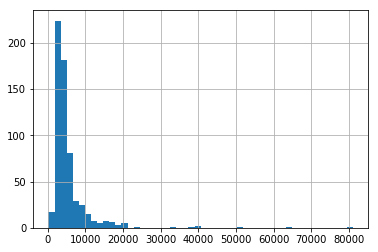

In [43]:
df["ApplicantIncome"].hist(bins=50)

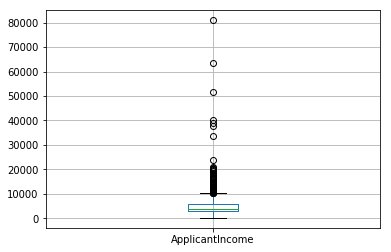

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot(column="ApplicantIncome")

In [35]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:' )
print (temp1)

print ('\nProbility of getting loan for each Credit History class:' )
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [44]:
df.loc[(df["Gender"]=="Female") & (df["Education"]=="Not Graduate") & (df["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


In [48]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values="Loan_Status",index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print("Frequency table for credit history")
print(temp1)

print("\n Probability of getting loan for credit history class")
print(temp2)

Frequency table for credit history
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probability of getting loan for credit history class
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Probability of getting loan by credit history')

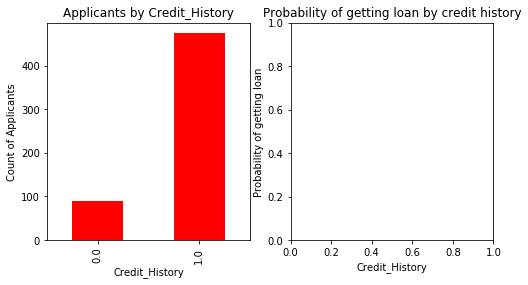

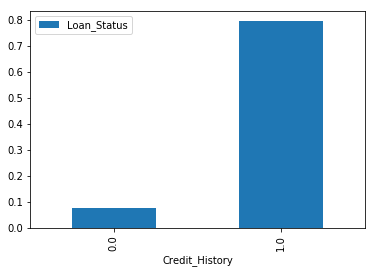

In [56]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar', color=['red'])

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

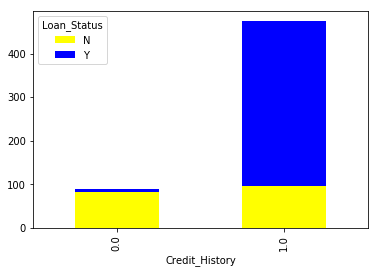

In [58]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['yellow','blue'], grid=False)

In [62]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, df, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],df[outcome])
  
  #Make predictions on training set:s
    
  predictions = model.predict(df[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,df[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(df.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (df[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = df[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(df[predictors].iloc[test,:], df[outcome].iloc[test]))
 
  print( "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(df[predictors],df[outcome]) 

 

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
